# Data Science Capstone 2

## Weather Forecaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load the datasets
weather_dataset = pd.read_csv("modified_data/weather_prediction_dataset_finalized.csv")

#This dataset is optional and provides a template showing all the times the weather is appropriate for a picnic
weather_for_picnic = pd.read_csv("raw_data/weather_prediction_bbq_labels.csv")

In [6]:
#Load the training datset
train = pd.read_csv("modified_data/weather_prediction_training_dataset.csv")

#Load the testing dataset
test = pd.read_csv("modified_data/weather_prediction_testing_dataset.csv")

In [7]:
train.head(30)

,DATE,CITY,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,target,wind_speed,wind_gust
0,2000-01-01,BASEL,1,8.0,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3.6,NaN,NaN
1,2000-01-02,BASEL,1,8.0,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,2.2,NaN,NaN
2,2000-01-03,BASEL,1,5.0,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,3.9,NaN,NaN
3,2000-01-04,BASEL,1,7.0,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,6.0,NaN,NaN
4,2000-01-05,BASEL,1,5.0,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,4.2,NaN,NaN
5,2000-01-06,BASEL,1,3.0,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,6.9,4.7,NaN,NaN
6,2000-01-07,BASEL,1,8.0,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,6.2,5.6,NaN,NaN
7,2000-01-08,BASEL,1,4.0,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,8.4,4.6,NaN,NaN
8,2000-01-09,BASEL,1,8.0,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,5.7,2.4,NaN,NaN
9,2000-01-10,BASEL,1,8.0,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,3.8,3.2,NaN,NaN


In [8]:
test.head(30)

,DATE,CITY,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,target,wind_speed,wind_gust
0,2008-01-01,BASEL,1,8.0,0.86,1.0257,0.22,0.00,0.0,-0.5,-2.2,0.9,-1.4,NaN,NaN
1,2008-01-02,BASEL,1,8.0,0.67,1.0181,0.25,0.00,0.0,-1.4,-2.1,-0.8,-0.5,NaN,NaN
2,2008-01-03,BASEL,1,7.0,0.68,1.0076,0.28,0.00,0.1,-0.5,-3.1,3.2,-0.3,NaN,NaN
3,2008-01-04,BASEL,1,8.0,0.80,1.0131,0.14,0.00,0.0,-0.3,-3.6,2.3,6.3,NaN,NaN
4,2008-01-05,BASEL,1,8.0,0.74,1.0126,0.10,1.14,0.0,6.3,1.7,11.6,6.4,NaN,NaN
5,2008-01-06,BASEL,1,7.0,0.88,1.0157,0.19,0.54,0.1,6.4,4.6,8.3,7.0,NaN,NaN
6,2008-01-07,BASEL,1,5.0,0.79,1.0211,0.28,0.37,1.2,7.0,2.3,11.5,3.7,NaN,NaN
7,2008-01-08,BASEL,1,4.0,0.76,1.0251,0.60,0.00,6.8,3.7,0.9,6.9,3.7,NaN,NaN
8,2008-01-09,BASEL,1,7.0,0.87,1.0213,0.16,0.12,0.0,3.7,1.0,6.3,6.1,NaN,NaN
9,2008-01-10,BASEL,1,6.0,0.82,1.0203,0.67,0.00,7.5,6.1,3.7,9.3,7.3,NaN,NaN


In [9]:
#tscv = TimeSeriesSplit(n_splits=5)
#for train_ind, test_ind in tscv.split(weather_dataset):
#    train, test = weather_dataset.iloc[train_ind], weather_dataset.iloc[test_ind]

In [7]:
X_train = train.drop(columns='target')
y_train = train.target
X_test = test.drop(columns='target')
y_test = test.target

In [9]:
names_list = ['CITY', 'MONTH']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((54795, 11), (10959, 11))

### Modeling/Evaluating Functions

In [10]:
def select_city(train, test, location):
    #Given a location, split the data into X and y
    train = train.loc[train['CITY'] == location]
    test = test.loc[test['CITY'] == location]

    X_train = train.drop(columns='target')
    y_train = train.target
    X_test = test.drop(columns='target')
    y_test = test.target

    return (X_train, y_train, X_test, y_test)

In [17]:
def select_model(model_type, params=None, y_train=None, y_test=None):
    if model_type == 'Original':
        model = make_pipeline(
            SimpleImputer(strategy='mean'),
            StandardScaler(),
            SelectKBest(f_regression, k=3),
            DecisionTreeRegressor(random_state=5)
        )
    elif model_type == 'Linear Regression':
        model = make_pipeline(
            SimpleImputer(strategy=params['strategy']), 
            StandardScaler(),
            LinearRegression()
        )
    elif model_type == 'Random Forest':
        model = make_pipeline(
            SimpleImputer(strategy=params['strategy'], fill_value=params['fill_value']),
            StandardScaler(),
            RandomForestRegressor(random_state=params['random_state'])
        )
    elif model_type == 'XGBoost':
        model = xgb.XGBRegressor(**params)
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.fit_transform(y_test)
    elif model_type == 'CatBoost':
        model = CatBoostRegressor(
            iterations=params['iterations'],      
            learning_rate=params['learning_rate'],   
            depth=params['depth'],              
            verbose=0
        )
    elif model_type == 'LightGBM':
        model = lgb.LGBMRegressor(
            num_leaves=params['num_leaves'],
            learning_rate=params['learning_rate'],
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth']
        )
    else:
        print("Please input an available model type: [Original, Linear Regression, Random Forest, XGBoost, CatBoost, LightGBM]")
        model = DummyRegressor(strategy='mean')
    return model, y_train, y_test

In [12]:
def make_prediction(model, X_train, y_train, X_test, y_test, hypertuning=False):
    if hypertuning == False:
        model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate the model with performance metrics
    r2 = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
    RMSE = mean_squared_error(y_train, y_train_pred, squared=False), mean_squared_error(y_test, y_test_pred, squared=False)

    return r2, RMSE

In [13]:
def get_metrics(cv_score_list, r2_metric, RMSE_metric):
    cv_test_scores = []
    r2_train_scores = []
    r2_test_scores = []
    RMSE_train_scores = []
    RMSE_test_scores = []
    for score in cv_score_list:
        for cv in score['test_score']:
            cv_test_scores.append(cv)
    for r2 in r2_metric:
        r2_train_scores.append(r2[0])
        r2_test_scores.append(r2[1])
    for rmse in RMSE_metric:
        RMSE_train_scores.append(rmse[0])
        RMSE_test_scores.append(rmse[1])
    return cv_test_scores, r2_train_scores, r2_test_scores, RMSE_train_scores, RMSE_test_scores

In [14]:
def calculate_metrics(cv_test_scores, r2_train_scores, r2_test_scores, RMSE_train_scores, RMSE_test_scores):
    cv_mean = np.mean(cv_test_scores)
    cv_std = np.std(cv_test_scores)
    print("Mean and standard deviation of cross validations:", cv_mean, cv_std)

    r2_train = np.mean(r2_train_scores), np.std(r2_train_scores)
    print("Mean and standard deviation of R-squared for training set:", r2_train)
    r2_test = np.mean(r2_test_scores), np.std(r2_test_scores) 
    print("Mean and standard deviation of R-squared for testing set:", r2_test)

    rmse_train = np.mean(RMSE_train_scores), np.std(RMSE_train_scores)
    print("Mean and standard deviation of RMSE for training set:", rmse_train)
    rmse_test = np.mean(RMSE_test_scores), np.std(RMSE_test_scores)
    print("Mean and standard deviation of RMSE for testing set:", rmse_test)

In [15]:
city_names = ["BASEL", "BUDAPEST", "DE_BILT", "DRESDEN", "DUSSELDORF", "HEATHROW", "KASSEL", "LJUBLJANA", "MAASTRICHT",
              "MALMO", "MONTELIMAR", "MUENCHEN", "OSLO", "PERPIGNAN", "ROMA", "SONNBLICK", "STOCKHOLM", "TOURS"]

### Decision Tree (Old Model)

In [18]:
#Original Model based off of a Decision Tree
dt_cv_score_list = []
dt_r2_metric = []
dt_RMSE_metric = []

for city in city_names:
    #X, y split
    X_train, y_train, X_test, y_test = select_city(train, test, city)

    #Set up parameters and select the model
    DT_pipe, le_train, le_test = select_model('Original')

    #Perform cross validation
    names_list = ['DATE', 'CITY', 'MONTH']
    X_train.drop(columns=names_list, inplace=True)
    X_test.drop(columns=names_list, inplace=True)
    cv_scores = cross_validate(DT_pipe, X_train, y_train, cv=5)
    dt_cv_score_list.append(cv_scores)

    r2, RMSE = make_prediction(DT_pipe, X_train, y_train, X_test, y_test)
    dt_r2_metric.append(r2)
    dt_RMSE_metric.append(RMSE)

In [19]:
dt_cv_test_scores, dt_r2_train_scores, dt_r2_test_scores, dt_RMSE_train_scores, dt_RMSE_test_scores = get_metrics(dt_cv_score_list, dt_r2_metric, dt_RMSE_metric)
print("Accuracy metrics for original model (decision tree)")
calculate_metrics(dt_cv_test_scores, dt_r2_train_scores, dt_r2_test_scores, dt_RMSE_train_scores, dt_RMSE_test_scores)

Accuracy metrics for original model (decision tree)
Mean and standard deviation of cross validations: 0.8157434763759254 0.043722729612845256
Mean and standard deviation of R-squared for training set: (np.float64(0.998099433122355), np.float64(0.0029898944046222492))
Mean and standard deviation of R-squared for testing set: (np.float64(0.8195571080424244), np.float64(0.037537512556329235))
Mean and standard deviation of RMSE for training set: (np.float64(0.21526261227714608), np.float64(0.20461929174099677))
Mean and standard deviation of RMSE for testing set: (np.float64(2.9648006212158715), np.float64(0.3291206861041607))


In [36]:
dt_scores = []
dt_times_fit = []
dt_times_score = []

for cv in dt_cv_score_list:
    dt_scores.append(cv['test_score'])
    dt_times_fit.append(cv['fit_time'])
    dt_times_score.append(cv['score_time'])

dt_scores = np.array(dt_scores)
dt_times_fit = np.array(dt_times_fit)
dt_times_score = np.array(dt_times_score)

dt_scores = dt_scores.flatten()
dt_times_fit = dt_times_fit.flatten()
dt_times_score = dt_times_score.flatten()

In [39]:
dt_r2_train = []
dt_r2_test = []

for r2 in dt_r2_metric:
    dt_r2_train.append(r2[0])
    dt_r2_test.append(r2[1])

The values seen above for the decision tree represent a portion of the old weather forecaster model that was tasked with predicting temperature. The most notable issues seen was overfitting to the training data that led to reduced accuracy during the cross validation and testing phase.

### Linear Regression

In [42]:
# Linear Regression with mean imputation
lr_cv_score_list = []
lr_r2_metric = []
lr_RMSE_metric = []

for city in city_names:
    #X, y split
    X_train, y_train, X_test, y_test = select_city(train, test, city)

    #Set up parameters and select the model
    params = {'strategy': 'mean'}
    LR_pipe, le_train, le_test = select_model('Linear Regression', params)

    #Perform cross validation
    names_list = ['DATE', 'CITY', 'MONTH']
    X_train.drop(columns=names_list, inplace=True)
    X_test.drop(columns=names_list, inplace=True)
    cv_scores = cross_validate(LR_pipe, X_train, y_train, cv=5)
    lr_cv_score_list.append(cv_scores)

    r2, RMSE = make_prediction(LR_pipe, X_train, y_train, X_test, y_test)
    lr_r2_metric.append(r2)
    lr_RMSE_metric.append(RMSE)

In [43]:
lr_cv_test_scores, lr_r2_train_scores, lr_r2_test_scores, lr_RMSE_train_scores, lr_RMSE_test_scores = get_metrics(lr_cv_score_list, lr_r2_metric, lr_RMSE_metric)
print("Accuracy metrics for linear regression with mean imputation")
calculate_metrics(lr_cv_test_scores, lr_r2_train_scores, lr_r2_test_scores, lr_RMSE_train_scores, lr_RMSE_test_scores)

Accuracy metrics for linear regression with mean imputation
Mean and standard deviation of cross validations: 0.9158015927997724 0.021068883721244425
Mean and standard deviation of R-squared for training set: (np.float64(0.9211639009810914), np.float64(0.016729091130693763))
Mean and standard deviation of R-squared for testing set: (np.float64(0.9198305464459859), np.float64(0.016262445864020293))
Mean and standard deviation of RMSE for training set: (np.float64(2.0048044649017043), np.float64(0.23688036778730057))
Mean and standard deviation of RMSE for testing set: (np.float64(1.9758151370777943), np.float64(0.1934826116783981))


In [44]:
lr_scores = []
lr_times_fit = []
lr_times_score = []

for cv in lr_cv_score_list:
    lr_scores.append(cv['test_score'])
    lr_times_fit.append(cv['fit_time'])
    lr_times_score.append(cv['score_time'])

lr_scores = np.array(lr_scores)
lr_times_fit = np.array(lr_times_fit)
lr_times_score = np.array(lr_times_score)

lr_scores = lr_scores.flatten()
lr_times_fit = lr_times_fit.flatten()
lr_times_score = lr_times_score.flatten()

In [45]:
lr_r2_train = []
lr_r2_test = []

for r2 in lr_r2_metric:
    lr_r2_train.append(r2[0])
    lr_r2_test.append(r2[1])

### Random Forest

In [49]:
#Random forest with mean imputation
rf_cv_score_list = []
rf_r2_metric = []
rf_RMSE_metric = []

for city in city_names:
    #X, y split
    X_train, y_train, X_test, y_test = select_city(train, test, city)

    #Set up parameters and select the model
    params = {'strategy': 'mean', 'random_state': 5, 'fill_value': None}
    RF_pipe, le_train, le_test = select_model('Random Forest', params)

    #Perform cross validation
    names_list = ['DATE', 'CITY', 'MONTH']
    X_train.drop(columns=names_list, inplace=True)
    X_test.drop(columns=names_list, inplace=True)
    cv_scores = cross_validate(RF_pipe, X_train, y_train, cv=5)
    rf_cv_score_list.append(cv_scores)

    r2, RMSE = make_prediction(RF_pipe, X_train, y_train, X_test, y_test)
    rf_r2_metric.append(r2)
    rf_RMSE_metric.append(RMSE)

In [50]:
rf_cv_test_scores, rf_r2_train_scores, rf_r2_test_scores, rf_RMSE_train_scores, rf_RMSE_test_scores = get_metrics(rf_cv_score_list, rf_r2_metric, rf_RMSE_metric)
print("Accuracy metrics for random forest with mean imputation")
calculate_metrics(rf_cv_test_scores, rf_r2_train_scores, rf_r2_test_scores, rf_RMSE_train_scores, rf_RMSE_test_scores)

Accuracy metrics for random forest with mean imputation
Mean and standard deviation of cross validations: 0.9141206934989343 0.020242080933146576
Mean and standard deviation of R-squared for training set: (np.float64(0.9887740587214378), np.float64(0.0022955516249328913))
Mean and standard deviation of R-squared for testing set: (np.float64(0.9200700074625385), np.float64(0.015847961207258864))
Mean and standard deviation of RMSE for training set: (np.float64(0.7565545787697364), np.float64(0.0841998222116411))
Mean and standard deviation of RMSE for testing set: (np.float64(1.9718218791209583), np.float64(0.17673121677939715))


In [51]:
rf_scores = []
rf_times_fit = []
rf_times_score = []

for cv in rf_cv_score_list:
    rf_scores.append(cv['test_score'])
    rf_times_fit.append(cv['fit_time'])
    rf_times_score.append(cv['score_time'])

rf_scores = np.array(rf_scores)
rf_times_fit = np.array(rf_times_fit)
rf_times_score = np.array(rf_times_score)

rf_scores = rf_scores.flatten()
rf_times_fit = rf_times_fit.flatten()
rf_times_score = rf_times_score.flatten()

In [52]:
rf_r2_train = []
rf_r2_test = []

for r2 in rf_r2_metric:
    rf_r2_train.append(r2[0])
    rf_r2_test.append(r2[1])

### CatBoost

In [56]:
import os
import pickle
import catboost
import lightgbm

In [57]:
cat_models = []
for i in range(18):
    model_path = f'models/catboost_submodels/weather_forecaster_temperature_model_catboost_{city_names[i]}.pkl'
    if os.path.exists(model_path):
        with open(model_path, 'rb') as f:
            cat_model = pickle.load(f)
        print(i+1)
    else:
        print("Expected model not found")
    cat_models.append(cat_model)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [59]:
cat_cv_score_list = []
cat_r2_metric = []
cat_RMSE_metric = []

for i in range(18):
    #X, y split
    X_train, y_train, X_test, y_test = select_city(train, test, city_names[i])

    #Select the model
    cat_model = cat_models[i]

    #Perform cross validation
    names_list = ['DATE', 'CITY', 'MONTH']
    X_train.drop(columns=names_list, inplace=True)
    X_test.drop(columns=names_list, inplace=True)
    cv_scores = cross_validate(cat_model, X_train, y_train, cv=5)
    cat_cv_score_list.append(cv_scores)

    #Though not hyperparameter tuning, the model has already been fit and only needs to predict
    r2, RMSE = make_prediction(cat_model, X_train, y_train, X_test, y_test, hypertuning=True)
    cat_r2_metric.append(r2)
    cat_RMSE_metric.append(RMSE)

In [60]:
cat_cv_test_scores, cat_r2_train_scores, cat_r2_test_scores, cat_RMSE_train_scores, cat_RMSE_test_scores = get_metrics(cat_cv_score_list, cat_r2_metric, cat_RMSE_metric)
print("Accuracy metrics for catboost")
calculate_metrics(cat_cv_test_scores, cat_r2_train_scores, cat_r2_test_scores, cat_RMSE_train_scores, cat_RMSE_test_scores)

Accuracy metrics for catboost
Mean and standard deviation of cross validations: 0.9185991491203664 0.01944804193727662
Mean and standard deviation of R-squared for training set: (np.float64(0.9446180776416452), np.float64(0.014678802651931527))
Mean and standard deviation of R-squared for testing set: (np.float64(0.9240833478262673), np.float64(0.014856070418597028))
Mean and standard deviation of RMSE for training set: (np.float64(1.6746603170703755), np.float64(0.2262614416507572))
Mean and standard deviation of RMSE for testing set: (np.float64(1.9219318763821436), np.float64(0.17102352810795002))


In [61]:
cat_scores = []
cat_times_fit = []
cat_times_score = []

for cv in cat_cv_score_list:
    cat_scores.append(cv['test_score'])
    cat_times_fit.append(cv['fit_time'])
    cat_times_score.append(cv['score_time'])

cat_scores = np.array(cat_scores)
cat_times_fit = np.array(cat_times_fit)
cat_times_score = np.array(cat_times_score)

cat_scores = cat_scores.flatten()
cat_times_fit = cat_times_fit.flatten()
cat_times_score = cat_times_score.flatten()

In [62]:
cat_r2_train = []
cat_r2_test = []

for r2 in cat_r2_metric:
    cat_r2_train.append(r2[0])
    cat_r2_test.append(r2[1])

### LightGBM

In [65]:
light_models = []
for i in range(18):
    model_path = f'models/lightgbm_submodels/weather_forecaster_temperature_model_lightgbm_{city_names[i]}.pkl'
    if os.path.exists(model_path):
        with open(model_path, 'rb') as f:
            light_model = pickle.load(f)
        print(i+1)
    else:
        print("Expected model not found")
    light_models.append(light_model)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [66]:
light_models

[LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=10),
 LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, num_leaves=10),
 LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, num_leaves=5),
 LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=500, num_leaves=100),
 LGBMRegressor(learning_rate=0.05, max_depth=5, num_leaves=100),
 LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, num_leaves=5),
 LGBMRegressor(max_depth=10, num_leaves=5),
 LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=10),
 LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, num_leaves=5),
 LGBMRegressor(max_depth=3, num_leaves=100),
 LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=500, num_leaves=100),
 LGBMRegressor(learning_rate=0.05, max_depth=5, num_leaves=30),
 LGBMRegressor(max_depth=5, num_leaves=10),
 LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=10),
 LGBMRegressor

In [67]:
light_cv_score_list = []
light_r2_metric = []
light_RMSE_metric = []

for i in range(18):
    #X, y split
    X_train, y_train, X_test, y_test = select_city(train, test, city_names[i])

    #Set up the random search object
    light_model = light_models[i]

    #Find the best parameters
    names_list = ['DATE', 'CITY', 'MONTH']
    X_train.drop(columns=names_list, inplace=True)
    X_test.drop(columns=names_list, inplace=True)
    cv_scores = cross_validate(light_model, X_train, y_train, cv=5)
    light_cv_score_list.append(cv_scores)

    #Though not hyperparameter tuning, the model has already been fit and only needs to predict
    r2, RMSE = make_prediction(light_model, X_train, y_train, X_test, y_test, hypertuning=True)
    light_r2_metric.append(r2)
    light_RMSE_metric.append(RMSE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1599
[LightGBM] [Info] Number of data points in the train set: 2337, number of used features: 9
[LightGBM] [Info] Start training from score 10.878006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1598
[LightGBM] [Info] Number of data points in the train set: 2337, number of used features: 9
[LightGBM] [Info] Start training from score 11.380274
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1588
[LightGBM] [Info] Number of data points in the train set: 2338, number of used features: 9
[LightGBM] [Info] Start trainin

In [68]:
light_cv_test_scores, light_r2_train_scores, light_r2_test_scores, light_RMSE_train_scores, light_RMSE_test_scores = get_metrics(light_cv_score_list, light_r2_metric, light_RMSE_metric)
print("Accuracy metrics for lightgbm")
calculate_metrics(light_cv_test_scores, light_r2_train_scores, light_r2_test_scores, light_RMSE_train_scores, light_RMSE_test_scores)

Accuracy metrics for lightgbm
Mean and standard deviation of cross validations: 0.9180053284299741 0.01987337934091608
Mean and standard deviation of R-squared for training set: (np.float64(0.9425033680636711), np.float64(0.012803927943043482))
Mean and standard deviation of R-squared for testing set: (np.float64(0.9235298037238778), np.float64(0.015249725231646536))
Mean and standard deviation of RMSE for training set: (np.float64(1.7093685534867753), np.float64(0.192974451921603))
Mean and standard deviation of RMSE for testing set: (np.float64(1.9288062896766358), np.float64(0.17899232406025684))


In [69]:
light_scores = []
light_times_fit = []
light_times_score = []

for cv in light_cv_score_list:
    light_scores.append(cv['test_score'])
    light_times_fit.append(cv['fit_time'])
    light_times_score.append(cv['score_time'])

light_scores = np.array(light_scores)
light_times_fit = np.array(light_times_fit)
light_times_score = np.array(light_times_score)

light_scores = light_scores.flatten()
light_times_fit = light_times_fit.flatten()
light_times_score = light_times_score.flatten()

In [70]:
light_r2_train = []
light_r2_test = []

for r2 in light_r2_metric:
    light_r2_train.append(r2[0])
    light_r2_test.append(r2[1])

### Data Visualizations

In [ ]:
# Plot 1: Cross validation accuracies

In [72]:
iterations = np.linspace(1, 90, num=90, dtype=int)
iterations

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90])

In [73]:
df_1 = pd.DataFrame({"iterations": iterations,
                    "Original": dt_scores,
                  "Linear Reg.": lr_scores,
                  "Random Forest": rf_scores,
                  "CatBoost": cat_scores,
                  "LightGBM": light_scores})
df_1

,iterations,Original,Linear Reg.,Random Forest,CatBoost,LightGBM
0,1,0.798787,0.903051,0.904334,0.911812,0.910343
1,2,0.817048,0.905254,0.909108,0.916365,0.913025
2,3,0.826445,0.924203,0.920016,0.925801,0.924232
3,4,0.841167,0.923838,0.927862,0.931919,0.932879
4,5,0.816192,0.922848,0.917701,0.924596,0.922255
...,...,...,...,...,...,...
85,86,0.748279,0.893964,0.889113,0.894935,0.895170
86,87,0.788242,0.892351,0.894128,0.897486,0.896413
87,88,0.784386,0.903231,0.896725,0.906091,0.895683
88,89,0.815420,0.906127,0.907760,0.914057,0.910926


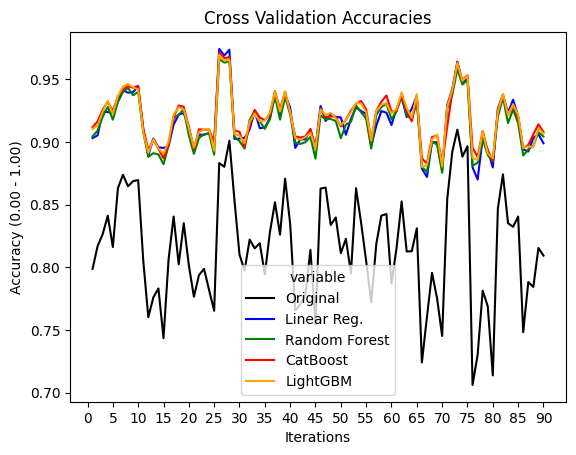

In [81]:
sns.lineplot(x='iterations', y='value', hue='variable',
             data=pd.melt(df_1, ["iterations"]),
            palette=['black', 'blue', 'green', 'red', 'orange'])

plt.xticks(ticks=np.arange(0, 91, 5))
plt.title("Cross Validation Accuracies")
plt.xlabel("Iterations")
plt.ylabel("Accuracy (0.00 - 1.00)")
plt.show()

In [ ]:
# Plot 2: Training vs Testing r-squared values

In [85]:
model_names = ["Original", "Original", "Linear Reg.", "Linear Reg.", "Random Forest", "Random Forest",
               "CatBoost", "CatBoost", "LightGBM", "LightGBM"]

In [86]:
dataset_type = ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"]

In [87]:
df_2 = pd.DataFrame({"Models": model_names,
                     "Dataset": dataset_type,
                     "Average R2 Values": [np.mean(dt_r2_train), np.mean(dt_r2_test), np.mean(lr_r2_train), np.mean(lr_r2_test), np.mean(rf_r2_train),
                                   np.mean(rf_r2_test), np.mean(cat_r2_train), np.mean(cat_r2_test), np.mean(light_r2_train), np.mean(light_r2_test)]})
df_2

,Models,Dataset,Average R2 Values
0,Original,Train,0.998099
1,Original,Test,0.819557
2,Linear Reg.,Train,0.921164
3,Linear Reg.,Test,0.919831
4,Random Forest,Train,0.988774
5,Random Forest,Test,0.920070
6,CatBoost,Train,0.944618
7,CatBoost,Test,0.924083
8,LightGBM,Train,0.942503
9,LightGBM,Test,0.923530


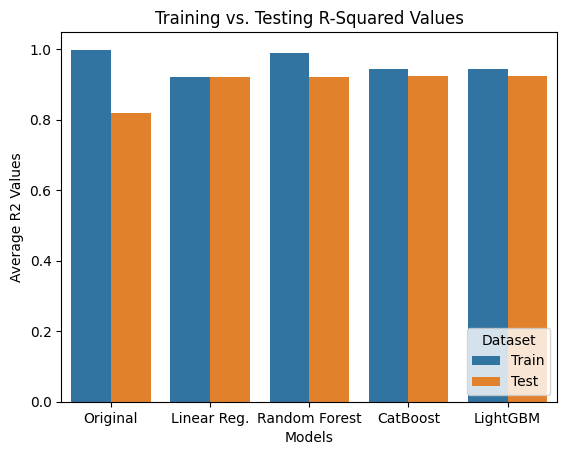

In [88]:
f = sns.barplot(x="Models",
            y="Average R2 Values",
            hue="Dataset",
            data=df_2)

plt.title("Training vs. Testing R-Squared Values")
sns.move_legend(f, "lower right")
plt.show()

In [ ]:
# Plot 3: Model fitting/training times

In [89]:
df_3 = pd.DataFrame({"iterations": iterations,
                    "Original": dt_times_fit,
                  "Linear Reg.": lr_times_fit,
                  "Random Forest": rf_times_fit,
                  "CatBoost": cat_times_fit,
                  "LightGBM": light_times_fit})
df_3

,iterations,Original,Linear Reg.,Random Forest,CatBoost,LightGBM
0,1,0.108240,0.047153,2.269565,6.052568,1.014422
1,2,0.030436,0.018591,2.269805,5.506008,0.758971
2,3,0.027331,0.016397,2.531393,5.656800,0.637743
3,4,0.027457,0.015987,2.601671,5.982448,0.666688
4,5,0.027511,0.015123,2.925285,5.516952,0.680918
...,...,...,...,...,...,...
85,86,0.029085,0.013677,2.063655,0.553937,0.082483
86,87,0.028866,0.010697,2.140663,0.560789,0.090786
87,88,0.044710,0.012692,2.507296,0.527274,0.083318
88,89,0.033440,0.014482,2.442939,0.564883,0.080890


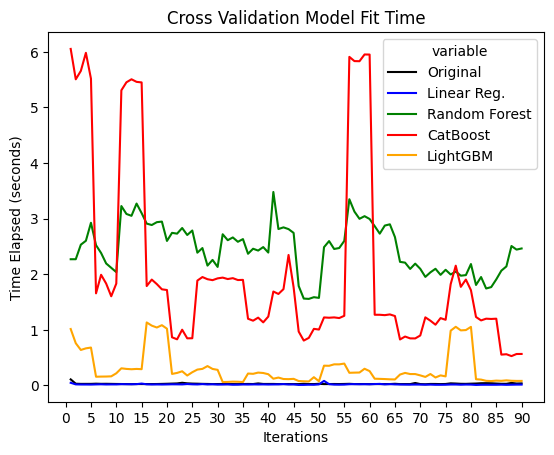

In [90]:
g1 = sns.lineplot(x='iterations', y='value', hue='variable',
             data=pd.melt(df_3, ["iterations"]),
            palette=['black', 'blue', 'green', 'red', 'orange'])

plt.xticks(ticks=np.arange(0, 91, 5))
plt.title("Cross Validation Model Fit Time")
plt.xlabel("Iterations")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

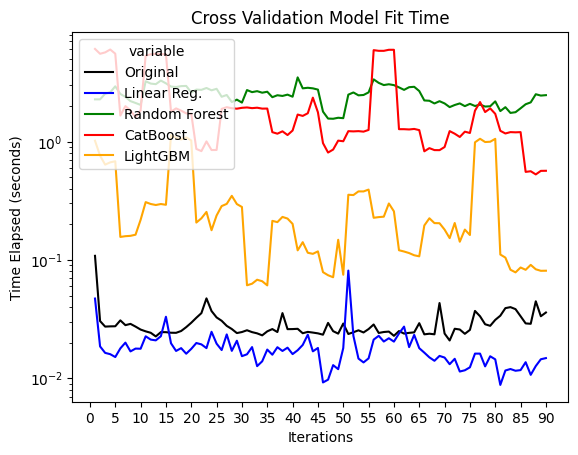

In [112]:
g2 = sns.lineplot(x='iterations', y='value', hue='variable',
             data=pd.melt(df_3, ["iterations"]),
            palette=['black', 'blue', 'green', 'red', 'orange'])

plt.xticks(ticks=np.arange(0, 91, 5))
g2.set(yscale='log')
plt.title("Cross Validation Model Fit Time")
sns.move_legend(g2, "upper left")
plt.xlabel("Iterations")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

In [ ]:
# Plot 4: Running sum of model fitting/training times

In [97]:
dt_times_fit_rs = []
lr_times_fit_rs = []
rf_times_fit_rs = []
cat_times_fit_rs = []
light_times_fit_rs = []
dt_rs = 0
lr_rs = 0
rf_rs = 0
cat_rs = 0
light_rs = 0

In [98]:
for i in range(90):
    dt_rs += dt_times_fit[i]
    lr_rs += lr_times_fit[i]
    rf_rs += rf_times_fit[i]
    cat_rs += cat_times_fit[i]
    light_rs += light_times_fit[i]
    dt_times_fit_rs.append(dt_rs)
    lr_times_fit_rs.append(lr_rs)
    rf_times_fit_rs.append(rf_rs)
    cat_times_fit_rs.append(cat_rs)
    light_times_fit_rs.append(light_rs)

In [113]:
df_4 = pd.DataFrame({"iterations": iterations,
                    "Original": dt_times_fit_rs,
                  "Linear Reg.": lr_times_fit_rs,
                  "Random Forest": rf_times_fit_rs,
                  "CatBoost": cat_times_fit_rs,
                  "LightGBM": light_times_fit_rs})
df_4

,iterations,Original,Linear Reg.,Random Forest,CatBoost,LightGBM
0,1,0.108240,0.047153,2.269565,6.052568,1.014422
1,2,0.138675,0.065744,4.539371,11.558577,1.773393
2,3,0.166007,0.082141,7.070764,17.215376,2.411135
3,4,0.193464,0.098128,9.672434,23.197824,3.077823
4,5,0.220975,0.113251,12.597719,28.714776,3.758741
...,...,...,...,...,...,...
85,86,2.452402,1.576417,211.692009,185.092749,27.655357
86,87,2.481268,1.587115,213.832672,185.653538,27.746143
87,88,2.525978,1.599807,216.339968,186.180812,27.829461
88,89,2.559417,1.614289,218.782907,186.745695,27.910351


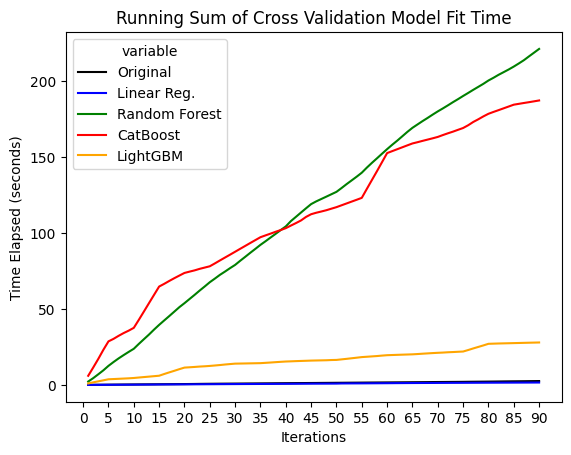

In [114]:
g3 = sns.lineplot(x='iterations', y='value', hue='variable',
             data=pd.melt(df_4, ["iterations"]),
            palette=['black', 'blue', 'green', 'red', 'orange'])

plt.xticks(ticks=np.arange(0, 91, 5))
plt.title("Running Sum of Cross Validation Model Fit Time")
plt.xlabel("Iterations")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

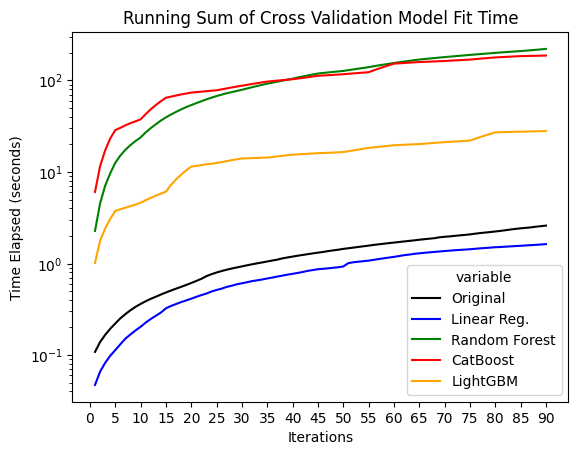

In [115]:
g4 = sns.lineplot(x='iterations', y='value', hue='variable',
             data=pd.melt(df_4, ["iterations"]),
            palette=['black', 'blue', 'green', 'red', 'orange'])

plt.xticks(ticks=np.arange(0, 91, 5))
g4.set(yscale='log')
plt.title("Running Sum of Cross Validation Model Fit Time")
plt.xlabel("Iterations")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

In [ ]:
# Plot 5: Model test scoring times + running sum variation

In [106]:
df_5 = pd.DataFrame({"iterations": iterations,
                    "Original": dt_times_score,
                  "Linear Reg.": lr_times_score,
                  "Random Forest": rf_times_score,
                  "CatBoost": cat_times_score,
                  "LightGBM": light_times_score})
df_5

,iterations,Original,Linear Reg.,Random Forest,CatBoost,LightGBM
0,1,0.007901,0.006048,0.027194,0.014389,0.008415
1,2,0.004183,0.004498,0.023195,0.005572,0.009297
2,3,0.004090,0.004584,0.027340,0.013172,0.008220
3,4,0.004033,0.004841,0.027906,0.008109,0.008064
4,5,0.003958,0.005097,0.027727,0.006783,0.007670
...,...,...,...,...,...,...
85,86,0.005164,0.003781,0.023045,0.005542,0.004529
86,87,0.007993,0.003794,0.024356,0.004238,0.004792
87,88,0.007731,0.004060,0.028879,0.004252,0.004654
88,89,0.004153,0.004160,0.027971,0.003870,0.004665


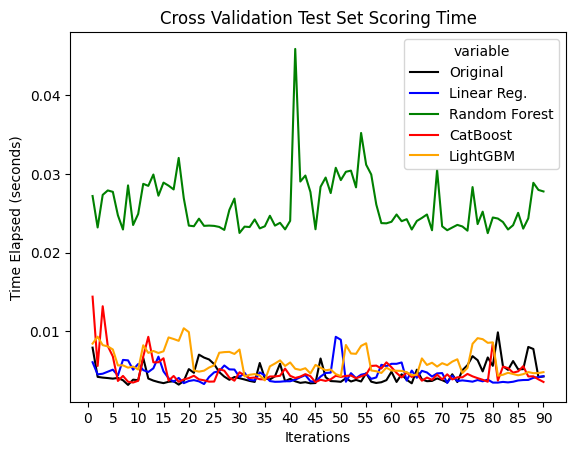

In [116]:
g5 = sns.lineplot(x='iterations', y='value', hue='variable',
             data=pd.melt(df_5, ["iterations"]),
            palette=['black', 'blue', 'green', 'red', 'orange'])

plt.xticks(ticks=np.arange(0, 91, 5))
plt.title("Cross Validation Test Set Scoring Time")
plt.xlabel("Iterations")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

In [108]:
dt_times_score_rs = []
lr_times_score_rs = []
rf_times_score_rs = []
cat_times_score_rs = []
light_times_score_rs = []
dt_rt = 0
lr_rt = 0
rf_rt = 0
cat_rt = 0
light_rt = 0

In [110]:
for i in range(90):
    dt_rt += dt_times_score[i]
    lr_rt += lr_times_score[i]
    rf_rt += rf_times_score[i]
    cat_rt += cat_times_score[i]
    light_rt += light_times_score[i]
    dt_times_score_rs.append(dt_rt)
    lr_times_score_rs.append(lr_rt)
    rf_times_score_rs.append(rf_rt)
    cat_times_score_rs.append(cat_rt)
    light_times_score_rs.append(light_rt)

In [111]:
df_5b = pd.DataFrame({"iterations": iterations,
                    "Original": dt_times_score_rs,
                  "Linear Reg.": lr_times_score_rs,
                  "Random Forest": rf_times_score_rs,
                  "CatBoost": cat_times_score_rs,
                  "LightGBM": light_times_score_rs})
df_5b

,iterations,Original,Linear Reg.,Random Forest,CatBoost,LightGBM
0,1,0.007901,0.006048,0.027194,0.014389,0.008415
1,2,0.012084,0.010547,0.050389,0.019961,0.017712
2,3,0.016174,0.015131,0.077729,0.033133,0.025933
3,4,0.020207,0.019972,0.105635,0.041242,0.033997
4,5,0.024165,0.025069,0.133362,0.048025,0.041666
...,...,...,...,...,...,...
85,86,0.383399,0.386525,2.227396,0.412075,0.533033
86,87,0.391392,0.390319,2.251753,0.416313,0.537826
87,88,0.399123,0.394379,2.280631,0.420566,0.542480
88,89,0.403276,0.398539,2.308602,0.424436,0.547145


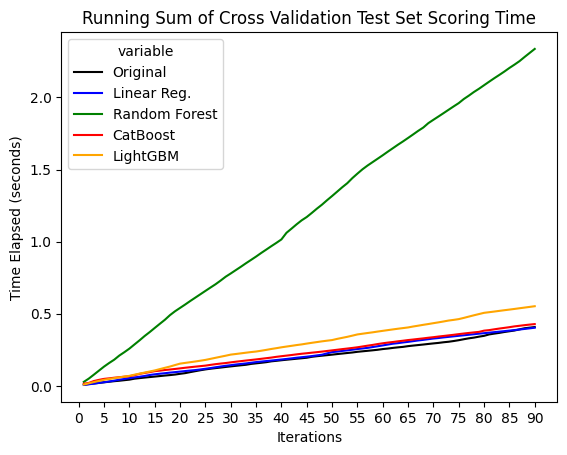

In [118]:
g6 = sns.lineplot(x='iterations', y='value', hue='variable',
             data=pd.melt(df_5b, ["iterations"]),
            palette=['black', 'blue', 'green', 'red', 'orange'])

plt.xticks(ticks=np.arange(0, 91, 5))
plt.title("Running Sum of Cross Validation Test Set Scoring Time")
plt.xlabel("Iterations")
plt.ylabel("Time Elapsed (seconds)")
plt.show()